In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

# Read Data

In [2]:
A = pd.read_csv("E:/Data Science/Datasets/Cars93.csv")

In [3]:
B = A[["Price","MPG.city"]]

# Data Preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
C = pd.DataFrame(mm.fit_transform(B),columns=["Price","MPG.city"])

# Finding best K by using Elbow curve

In [5]:
from sklearn.cluster import KMeans
k = range(2,20,1)
WCSS = []
for i in k:
    km = KMeans(n_clusters=i)
    km_model = km.fit(C)
    WCSS.append(km_model.inertia_)

In [6]:
WCSS

[2.984556204508492,
 1.7604339512829656,
 1.2111248917250903,
 0.8106745220475998,
 0.5533447368852447,
 0.434185897435692,
 0.361629910535126,
 0.32173521370079994,
 0.27848725890076265,
 0.2538701767503396,
 0.2272813484447847,
 0.1986845316334998,
 0.17270705579217452,
 0.15395744451189922,
 0.1412137134871394,
 0.13040916389335097,
 0.11719295820458328,
 0.10568344193296327]

([<matplotlib.axis.XTick at 0x253653c7c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

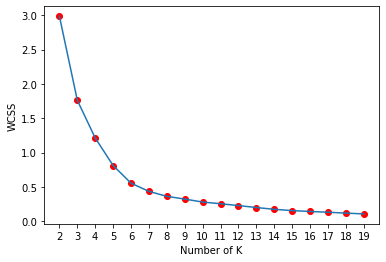

In [7]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS,c="red")
plt.plot(k,WCSS)
plt.xlabel("Number of K")
plt.ylabel("WCSS")
plt.xticks(k)

# Creat model by best K and train the model

In [8]:
k_model = KMeans(n_clusters=6)
model = k_model.fit(C)

In [9]:
model.labels_

array([3, 0, 0, 0, 0, 3, 2, 2, 2, 0, 0, 3, 3, 2, 3, 2, 2, 2, 0, 2, 3, 0,
       1, 3, 3, 2, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 2, 4, 1, 3, 4, 3, 1,
       3, 1, 3, 5, 0, 0, 0, 0, 1, 1, 3, 2, 0, 0, 5, 3, 2, 1, 2, 1, 3, 2,
       2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 0, 1, 1, 3, 3, 4, 1, 3, 3, 2, 3,
       2, 2, 2, 2, 2])

# Adding cluster labels and Make to the B dataframe

In [10]:
B["Cluster"] = model.labels_

In [11]:
B["Make"] = A["Make"]

In [12]:
B.head(3)

,Price,MPG.city,Cluster,Make
0,15.9,25,3,Acura Integra
1,33.9,18,0,Acura Legend
2,29.1,20,0,Audi 90


# Scatter plot of clustering with there centroid

Text(0, 0.5, 'Mileage in city')

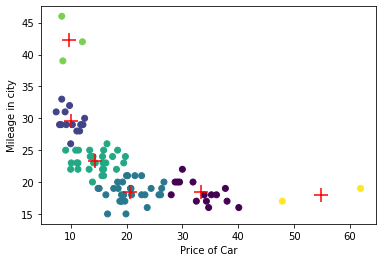

In [13]:
E = pd.DataFrame(mm.inverse_transform(model.cluster_centers_),columns=["X","Y"])
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.Cluster)
plt.scatter(E.X,E.Y,c="red",marker="+",s=200)
plt.xlabel("Price of Car")
plt.ylabel("Mileage in city")

# Finding Cluster value of Make

In [14]:
B[B["Make"]=="Acura Integra"][["Cluster"]].values[0][0]

3

In [15]:
B[B["Cluster"]==5].Make

47          Infiniti Q45
58    Mercedes-Benz 300E
Name: Make, dtype: object

# Find similar cars by entering make of the car

In [16]:
liked_car = input("Enter a car to find similar cars: ")
liked_car_cluter = B[B["Make"]== liked_car][["Cluster"]].values[0][0]
print("These are cars similar to the one you like")
for i in B[B["Cluster"]==liked_car_cluter].Make:
    print(i)

Enter a car to find similar cars: Acura Integra
These are cars similar to the one you like
Acura Integra
Buick Century
Chevrolet Cavalier
Chevrolet Corsica
Chevrolet Lumina
Chrysler LeBaron
Dodge Shadow
Dodge Spirit
Dodge Dynasty
Ford Escort
Ford Tempo
Ford Mustang
Ford Probe
Honda Prelude
Honda Accord
Hyundai Elantra
Hyundai Sonata
Mazda 626
Mercury Capri
Nissan Altima
Oldsmobile Achieva
Oldsmobile Cutlass_Ciera
Plymouth Laser
Pontiac Sunbird
Subaru Loyale
Subaru Legacy
Toyota Celica
Toyota Camry
Volkswagen Fox
